# Smart Proxy  library to get random proxy using Python [Hide your Identity]

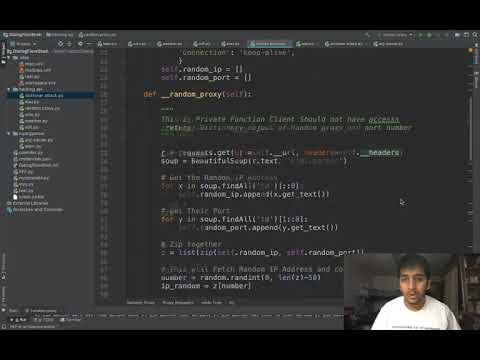

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('_z4DhRUg2Vs')

Article By 

Soumil Nitin Shah

Bachelor in Electronic Engineering
Master in Electrical Engineering 
Master in Computer Engineering 

Graduate Teaching/Research Assistant

Python Developer

soushah@my.bridgeport.edu

————————————————————————————————————

Blog
http://soumilshah1995.blogspot.com

Linkedin:	https://www.linkedin.com/in/shah-soumil

Github
https://github.com/soumilshah1995

Youtube channel
https://www.youtube.com/channel/UC_eOodxvwS_H7x2uLQa-svw

------------------------------------

# Objective:

Whenever you are doing webscrapping on any website its important that you  hide your identity. other  wise server might block you. Getting Proxy can be tough and also sometime costly. in this i have made a smart library with just 4 lines of code you can get any random IP Address and port number so you can use them when you are doing webscrapping

## important Note:

Assume your name of your python file is main and the code that i am about to show you is the library developed to do job in 3 lines of code.
Paster the Entire python code in your File called main and all way down start writing your code

copy the library ie python file in your working Directory and you can simple say from nameofpythonfile import *

## Assume your Work Directory is 

Foldername ---- IoTclass

                        > main.py
                        
                        > nameoffile.py
                        
                    

in your main Python File you will say from nameoffile import *

if that dosent work for some reason you can also copy entire 500 Line of library code in main.py and all the way down start writing your code 

### How to use 

In [2]:

# Create a class
proxy = Random_Proxy()

url = 'https://www.youtube.com'
request_type = "get"

r = proxy.Proxy_Request(url=url, request_type=request_type)
print(r)

Using Proxy {'https': '109.70.189.70:30480'}
Using Proxy {'https': '109.101.139.126:59254'}
Using Proxy {'https': '45.71.80.34:46505'}
Using Proxy {'https': '186.42.175.138:47601'}
Using Proxy {'https': '31.42.173.57:34639'}
Using Proxy {'https': '37.59.35.174:8080'}
Using Proxy {'https': '202.166.211.182:61767'}
<Response [200]>


# Here you see it tried Different Proxy which ever was working we used that IP and got Response 200

# The Library 

In [1]:
try:

    import requests
    from bs4 import BeautifulSoup
    import random

except:
    print(" Library Not Found !")


class Random_Proxy(object):

    def __init__(self):
        self.__url = 'https://www.sslproxies.org/'
        self.__headers = {
            'Accept-Encoding': 'gzip, deflate, sdch',
            'Accept-Language': 'en-US,en;q=0.8',
            'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
            'Referer': 'http://www.wikipedia.org/',
            'Connection': 'keep-alive',
            }
        self.random_ip = []
        self.random_port = []

    def __random_proxy(self):

        """
        This is Private Function Client Should not have accesss
        :return: Dictionary object of Random proxy and port number
        """

        r = requests.get(url=self.__url, headers=self.__headers)
        soup = BeautifulSoup(r.text, 'html.parser')

        # Get the Random IP Address
        for x in soup.findAll('td')[::8]:
            self.random_ip.append(x.get_text())

        # Get Their Port
        for y in soup.findAll('td')[1::8]:
            self.random_port.append(y.get_text())

        # Zip together
        z = list(zip(self.random_ip, self.random_port))

        # This will Fetch Random IP Address and corresponding PORT Number
        number = random.randint(0, len(z)-50)
        ip_random = z[number]

        # convert Tuple into String and formart IP and PORT Address
        ip_random_string = "{}:{}".format(ip_random[0],ip_random[1])

        # Create a Proxy
        proxy = {'https':ip_random_string}

        # return Proxy
        return proxy

    def Proxy_Request(self,request_type='get',url='',**kwargs):
        """

        :param request_type: GET, POST, PUT
        :param url: URL from which you want to do webscrapping
        :param kwargs: any other parameter you pass
        :return: Return Response
        """
        while True:
            try:
                proxy = self.__random_proxy()
                print("Using Proxy {}".format(proxy))
                r = requests.request(request_type,url,proxies=proxy,headers=self.__headers ,timeout=8, **kwargs)
                return r
                break
            except:
                pass
